# Building a Movie recommender

In [0]:
%matplotlib inline

import pandas
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

# Load Movie Ratings data

In [0]:
#Read userid-movieId-rating triplets
#This step might take time to download data from external sources
# triplets_file = 'https://static.turi.com/datasets/millionmovie/10000.txt'
# movies_metadata_file = 'https://static.turi.com/datasets/millionmovie/movie_data.csv'

movie_df_1 = pandas.read_csv('./ratings.csv')
# movie_df_1.columns = ['user_id', 'movie_id', 'listen_count']

#Read movie  metadata
# movie_df_2 =  pandas.read_csv(movies_metadata_file)

#Merge the two dataframes above to create input dataframe for recommender systems
# movie_df = pandas.merge(movie_df_1, movie_df_2.drop_duplicates(['movie_id']), on="movie_id", how="left") 

In [0]:
print(movie_df_1.head())
len(movie_df_1)

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


100004

In [0]:
movie_df = movie_df_1

# Explore data

Music data shows how many times a user listened to a movie, as well as the details of the movie.

In [0]:
movie_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

## Length of the dataset

In [0]:
print(len(movie_df))
movie_df = movie_df.head(10000)
print(len(movie_df))

100004
10000


## Create a subset of the dataset

In [0]:
movie_df = movie_df.head(10000)

#Merge movie title and artist_name columns to make a merged column
# movie_df['movie'] = movie_df['title'].map(str) + " - " + movie_df['artist_name']

## Showing the most popular movies in the dataset

In [0]:
movie_grouped = movie_df.groupby(['movieId']).agg({'rating': 'count'}).reset_index()
grouped_sum = movie_grouped['rating'].sum()
print(grouped_sum)
movie_grouped['percentage']  = movie_grouped['rating'].div(grouped_sum)*100
movie_grouped.sort_values(['rating', 'movieId'], ascending = [0,1])

10000


,movieId,rating,percentage
220,356,33,0.33
182,296,32,0.32
160,260,30,0.30
193,318,28,0.28
315,527,27,0.27
346,593,27,0.27
74,110,25,0.25
288,480,25,0.25
587,1196,25,0.25
273,457,24,0.24


## Count number of unique users in the dataset

In [0]:
users = movie_df['userId'].unique()

In [0]:
len(users)

70

## Quiz 1. Count the number of unique movies in the dataset

In [0]:
###Fill in the code here
movies = movie_df['movieId'].unique()
len(movies)

3622

# Create a movie recommender

In [0]:
train_data, test_data = train_test_split(movie_df, test_size = 0.20, random_state=0)
train_data.head()

,userId,movieId,rating,timestamp
7389,48,364,4.0,1319745852
9275,61,4306,3.5,1216050580
2995,17,7116,4.5,1127470554
5316,30,1346,4.0,945295052
356,5,231,3.5,1163373762


## Simple popularity-based recommender class (Can be used as a black box)

### Create an instance of popularity based recommender class

In [0]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'userId', 'movieId')

### Use the popularity model to make some predictions

In [0]:
user_id = users[20]
pm.recommend(user_id)

,userId,movieId,score,Rank
208,21,356,28,1.0
172,21,296,27,2.0
297,21,527,25,3.0
150,21,260,24,4.0
271,21,480,23,5.0
327,21,593,23,6.0
72,21,110,22,7.0
258,21,457,22,8.0
1123,21,2571,21,9.0
183,21,318,20,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

In [0]:
user_id = users[7]
pm.recommend(user_id)

,userId,movieId,score,Rank
208,8,356,28,1.0
172,8,296,27,2.0
297,8,527,25,3.0
150,8,260,24,4.0
271,8,480,23,5.0
327,8,593,23,6.0
72,8,110,22,7.0
258,8,457,22,8.0
1123,8,2571,21,9.0
183,8,318,20,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

### Quiz 2: Use the popularity based model to make predictions for the following user id (Note the difference in recommendations from the first user id).

In [0]:
###Fill in the code here
user_id = users[8]
pm.recommend(user_id)


,userId,movieId,score,Rank
208,9,356,28,1.0
172,9,296,27,2.0
297,9,527,25,3.0
150,9,260,24,4.0
271,9,480,23,5.0
327,9,593,23,6.0
72,9,110,22,7.0
258,9,457,22,8.0
1123,9,2571,21,9.0
183,9,318,20,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

## Build a movie recommender with personalization

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

## Class for an item similarity based personalized recommender system

### Create an instance of item similarity based recommender class

In [0]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userId', 'movieId')

### Use the personalized model to make some movie recommendations

In [0]:
#Print the movies for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data movies for the user userid: 6:
------------------------------------------------------------------------------------
3751
1639
1285
2761
903
2529
1687
2072
2571
2502
1747
3300
158
1204
2890
173
3052
7090
2174
2001
596
4641
3114
2528
2692
1876
1259
1250
8784
4975
2723
8874
7361
8636
2019
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060


,userId,movieId,score,rank
0,6.0,4370.0,0.217317,1.0
1,6.0,5445.0,0.217297,2.0
2,6.0,2011.0,0.202060,3.0
3,6.0,5464.0,0.199766,4.0
4,6.0,1266.0,0.196773,5.0
5,6.0,3504.0,0.194175,6.0
6,6.0,2115.0,0.192329,7.0
7,6.0,32587.0,0.191537,8.0
8,6.0,5679.0,0.190797,9.0
9,6.0,5989.0,0.189695,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

### Quiz 3. Use the personalized model to make recommendations for the following user id. (Note the difference in recommendations from the first user id.)

In [0]:
user_id = users[7]
#Fill in the code here
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data movies for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend movies for the user using personalized model
is_model.recommend(user_id)


------------------------------------------------------------------------------------
Training data movies for the user userid: 8:
------------------------------------------------------------------------------------
2324
1302
2791
2770
2502
6377
2762
8784
8533
1754
2100
47
457
8874
1291
2716
1625
5378
1219
33493
43871
44004
42007
6874
4896
33166
805
1225
7361
527
1552
5064
45
5464
2959
4262
2423
593
3147
2804
2858
5445
2139
1387
6879
2571
7143
1674
4993
4973
5669
1500
1358
1393
296
282
32587
1198
32
4011
8873
6870
5989
3948
5630
40819
4226
43556
7153
628
260
3996
2194
2302
858
1258
6378
1259
1196
520
4963
1265
4034
1777
2841
1876
356
1270
5952
1197
33794
1210
3578
50
2918
524
1704
318
4448
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 99
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :17518

,userId,movieId,score,rank
0,8.0,3504.0,0.223966,1.0
1,8.0,2011.0,0.220599,2.0
2,8.0,4027.0,0.218883,3.0
3,8.0,1263.0,0.215293,4.0
4,8.0,4370.0,0.214656,5.0
5,8.0,2329.0,0.212200,6.0
6,8.0,1213.0,0.211557,7.0
7,8.0,1266.0,0.208475,8.0
8,8.0,5679.0,0.208072,9.0
9,8.0,2115.0,0.207023,10.0


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

### We can also apply the model to find similar movies to any movie in the dataset

In [0]:
is_model.get_similar_items([2324])

no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :1856


,userId,movieId,score,rank
0,,4973,0.545455,1
1,,55247,0.500000,2
2,,8784,0.444444,3
3,,926,0.428571,4
4,,6953,0.428571,5
5,,5952,0.428571,6
6,,46578,0.428571,7
7,,51540,0.428571,8
8,,8807,0.428571,9
9,,67734,0.428571,10


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

In [0]:
movie = 47
###Fill in the code here
is_model.get_similar_items([movie])

no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :2596


,userId,movieId,score,rank
0,,1213,0.500000,1
1,,50,0.450000,2
2,,1252,0.437500,3
3,,1263,0.437500,4
4,,1244,0.428571,5
5,,1270,0.428571,6
6,,593,0.423077,7
7,,608,0.421053,8
8,,4973,0.411765,9
9,,4226,0.411765,10


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

## Quantitative comparison between the models

In [0]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:69
Length of user sample:3
Getting recommendations for user:51
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :26590
Getting recommendations for user:55
No. of unique songs for the user: 24
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :29372
Getting recommendations for user:6
No. of unique songs for the user: 35
no. of unique songs in the training set: 3215
Non zero values in cooccurence_matrix :51060
8.51924753189087


In [0]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


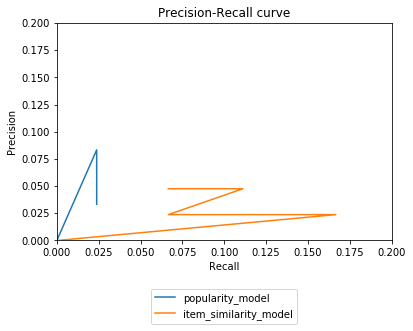

In [0]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")